In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"
import numpy as np
import sympy as sp
from IPython.display import HTML, display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from open_atmos_jupyter_utils import show_plot
from PyMPDATA import Solver, ScalarField, VectorField, Stepper, Options
from PyMPDATA.boundary_conditions import Periodic


In [2]:
mu = 0.001 # diffusion coefficient
dt = 0.0005
tmax = 5.0
nt = int(tmax / dt)

nx = 100
ux  = 0.25

omega = np.pi

min_x, max_x = -1, 1
dx = (max_x - min_x) / nx
Cx = ux * dt / dx

In [11]:
def analytic_solution(x):
    return np.exp(-((x+0.5)/0.1)**2) - np.exp(-((x-0.5)/0.1)**2) + 1.5

# def analytic_solution(x):
    # 2 between -0.5 and 0.5, 0 elsewhere
    # return np.where((abs(x) > 0.5), 0, 2)

# def analytic_solution(x):
#     2 between -0.6 and -0.3, 0 between 0.3 and 0.6, 1 elsewhere
#     return np.where(
#         (x >= -0.6) & (x <= -0.3), 2,
#         np.where((x > 0.3) & (x < 0.6), 0, 1)
#     )

def z(t):
    return np.array(
    [
        analytic_solution(x) for x in np.linspace(min_x, max_x, nx)
    ],
    dtype=float
)

In [12]:
u0 = z(t=0)

Text(0, 0.5, 'advectee')

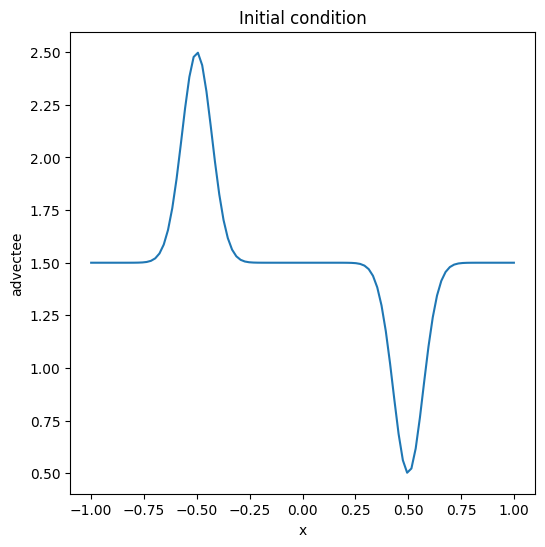

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(min_x, max_x, nx), u0, label='Initial condition')
plt.title('Initial condition')
plt.xlabel('x')
plt.ylabel('advectee')

Text(0, 0.5, 'advectee')

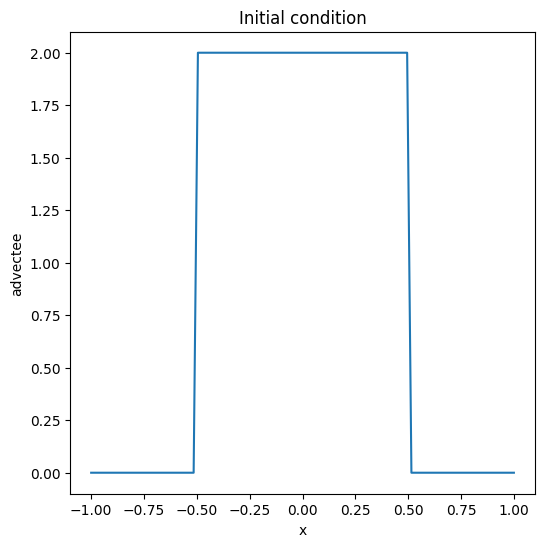

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(min_x, max_x, nx), u0, label='Initial condition')
plt.title('Initial condition')
plt.xlabel('x')
plt.ylabel('advectee')

Text(0, 0.5, 'advectee')

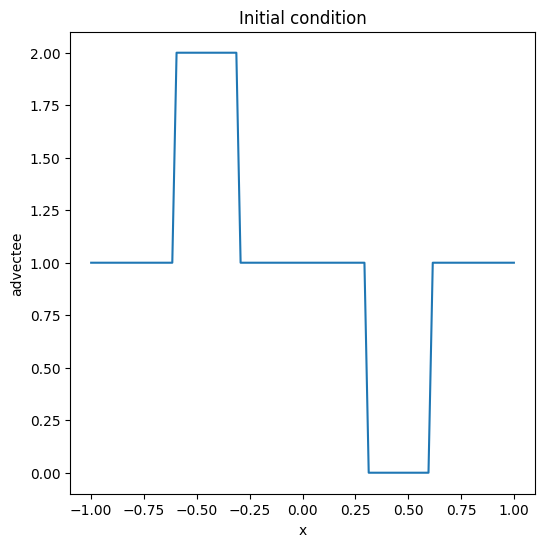

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(min_x, max_x, nx), u0, label='Initial condition')
plt.title('Initial condition')
plt.xlabel('x')
plt.ylabel('advectee')

In [14]:
opts = Options(n_iters=3, non_zero_mu_coeff=True, infinite_gauge=True, nonoscillatory=True)

boundary_conditions = (Periodic(),)
stepper = Stepper(options=opts, n_dims=len(u0.shape), non_unit_g_factor=False)
solver = Solver(stepper=stepper,
                advectee=ScalarField(u0.astype(dtype=opts.dtype), halo=opts.n_halo,
                                         boundary_conditions=boundary_conditions),
                advector=VectorField((np.full(u0.shape[0] + 1, 0, dtype=opts.dtype),), halo=opts.n_halo,
                                         boundary_conditions=boundary_conditions)
                )

In [15]:
print("CFL number: ", Cx)
print("Diffusion number: ", mu)
print("nt: ", nt)

CFL number:  0.00625
Diffusion number:  0.001
nt:  10000


In [16]:
solver.advance(nt, mu_coeff=(mu,))

7861198.49